## Multiclass Classification
### First method: k-nearest neighbours (kNN)
### Second method: Naive Bayess
### Third method: Logistic Regression + Gradient Descent + Regularization

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
import math
import sys
import random
import time

### Time Counting Method

In [2]:
def count_time(f, param_1, param_2, name):  
    start = time.perf_counter()
    res = f(param_1, param_2)
    total = time.perf_counter() - start
    print(f"Time for: {name} => {total}s")
    return res

### Data generatar

In [3]:
def standard_data_generator(N, noise):
    labels = np.array([[1]]*N + [[2]]*N + [[3]]*N + [[4]]*N)
    data = [random_data(1.5, noise, N), random_data(1.5, noise, N), 
            random_data(0.5, noise, N), random_data(1.5, noise, N),
            random_data(0.5, noise, N), random_data(0.5, noise, N),
            random_data(1.5, noise, N), random_data(0.5, noise, N)]
    conc_data_x1 = np.concatenate([d for d in data[::2]])
    conc_data_x2 = np.concatenate([d for d in data[1::2]])
    return {'x1': conc_data_x1, 'x2':conc_data_x2, 'y': labels}
    
    
def random_data(a, noise, N):
    data = np.random.uniform(a - noise, a + noise, size = N)
    return np.array([[d] for d in data])


def totally_random_data_generator(N):
    data_x1 = np.random.uniform(0.1, 1.9,size = N)
    data_x2 = np.random.uniform(0.1, 1.9,size = N)
    return {'x1': data_x1, 'x2': data_x2}


def advanced_theta_generator(n, mini, maxi):
    """
    Creates vector Theta with first values of parameters
    These values are random
    :param n: number of parameters
    :param mini, maxi: range for parameters randomizer
    :param value: default parameter value
    :return: vector nx1
    """
    return np.array([[random.uniform(mini,maxi)] for i in range(n)])

### Error Function

In [4]:
def error_function(distribution, y_labels):
    distribution = np.fliplr(distribution)
    maxs = np.argmax(distribution, axis=1)
    uniq = np.unique(y_labels).shape[0]
    res = np.count_nonzero(maxs != (uniq - y_labels.T))
    return res/y_labels.shape[0]

### k-Nearest Neighbours

In [34]:
def knn(train_data, val_data):
    x1_train = train_data['x1']
    x2_train = train_data['x2']
    y_train = train_data['y']
    x1_val = val_data['x1']
    x2_val = val_data['x2']
    y_val = val_data['y']
    return knn_model_selection(x1_val, x2_val, y_val, x1_train, x2_train, y_train)


def knn_model_selection(x1_val, x2_val, y_val, x1_train, x2_train, y_train):
    dists = calculate_distance(x1_val, x2_val, x1_train, x2_train)
    srt = sort_distances(dists, y_train)
    k_values = np.arange(1,x1_train.shape[0])
    error_list = list()
    labels_list = list()
    for k in k_values:
        distri, labels = calculate_distribution_knn(srt, k)
        error = error_function(distri, y_val)
        error_list.append(error)
        labels_list.append(labels)
    min_idx = error_list.index(min(error_list))
    return min(error_list), k_values[min_idx], error_list, k_values, labels_list[min_idx]


def calculate_distance(x1, x2, x1_train, x2_train):
    n1 = np.shape(x1)[0]
    n2 = np.shape(x1_train)[0]
    dists = np.array([((x1[v, 0] - x1_train)**2 + (x2[v, 0] - x2_train)**2)**(0.5) for v in range(n1)])    
    return dists[:,:,0]


def sort_distances(dists, y_labels):
    return y_labels[dists.argsort(kind='mergesort')][:,:,0]


def calculate_distribution_knn(y_labels, k):
    print(y_labels)
    print(k)
    m = np.unique(y_labels).shape[0]
    res = list()
    for line in y_labels:
        new_row = [0] * m
        for ki in range(k):
            buf = line[ki]
            new_row[buf-1] += 1 / k
        res.append(new_row)
    distri = np.array(res)
    labels = np.argmax(distri, axis = 1)
    print("old")
    print(distri)
    calc2(y_labels, k)
    return distri, labels

def calc2(y_labels, k):
    m = np.unique(y_labels).shape[0]
    distri = np.ones((y_labels.shape[0], m))
    for mi in range(m):
        buf = np.count_nonzero(y_labels[:,:k] == mi+1, axis=1)
        distri[:,mi-1] = buf/y_labels.shape[0]
    #print("new")
    #print(distri)
N_v = 2
N_t = 5
training_data = standard_data_generator(N_t, 0.45)
validation_data = standard_data_generator(N_v, 0.55)

res = knn(training_data, validation_data)


[[1 1 1 1 4 1 4 4 4 2 2 3 2 3 2 4 3 2 3 3]
 [4 1 1 4 1 1 4 1 4 3 2 4 3 3 2 2 3 2 3 2]
 [2 2 2 2 1 2 1 1 1 4 4 1 3 3 3 3 4 4 3 4]
 [2 2 2 2 3 2 3 3 1 3 4 3 1 4 1 4 1 4 1 4]
 [3 3 3 3 3 2 2 2 2 4 2 1 4 1 4 4 4 1 1 1]
 [3 3 3 3 3 4 4 4 2 2 2 4 1 4 2 1 2 1 1 1]
 [1 4 4 1 1 4 4 1 1 4 3 3 2 3 2 2 3 2 3 2]
 [4 4 4 4 1 4 1 3 3 1 1 1 3 3 2 3 2 2 2 2]]
1
old
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
[[1 1 1 1 4 1 4 4 4 2 2 3 2 3 2 4 3 2 3 3]
 [4 1 1 4 1 1 4 1 4 3 2 4 3 3 2 2 3 2 3 2]
 [2 2 2 2 1 2 1 1 1 4 4 1 3 3 3 3 4 4 3 4]
 [2 2 2 2 3 2 3 3 1 3 4 3 1 4 1 4 1 4 1 4]
 [3 3 3 3 3 2 2 2 2 4 2 1 4 1 4 4 4 1 1 1]
 [3 3 3 3 3 4 4 4 2 2 2 4 1 4 2 1 2 1 1 1]
 [1 4 4 1 1 4 4 1 1 4 3 3 2 3 2 2 3 2 3 2]
 [4 4 4 4 1 4 1 3 3 1 1 1 3 3 2 3 2 2 2 2]]
2
old
[[1.  0.  0.  0. ]
 [0.5 0.  0.  0.5]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.5 0.  0.  0.5]
 [0.  0.  0.  1. ]]
[[1 1 1 1 4 1 4 4 4 2 2 

### Naive Bayess - secret ingredient is gaussian distribution

$Y =  \begin{bmatrix}y^{(0)}\\y^{1)}\\...\\y^{(n-1)}\end{bmatrix}, X_{1} =  \begin{bmatrix}x^{(0)}_1\\x^{(1)}_1\\...\\x^{(n-1)}_1\end{bmatrix}, X_{2} =  \begin{bmatrix}x^{(0)}_2\\x^{(1)}_2\\...\\x^{(n-1)}_2\end{bmatrix}$

$\mu_{x,y} =  \frac{1}{n}  \sum_{i:y^{(i)} = y}^{} x^{(i)}_i$

$\sigma^2_{x,y} = \frac{1}{n} \sum_{i:y^{(i)} = y}(x^{(i)} -  \mu_{x,y})$

$p(x_j | y) = \frac{1}{\sqrt{2\pi \sigma^2_{x_j,y}}} \cdot exp-\frac{1}{2}(\frac{(x-\mu_{x_j,y})^2}{\sigma^2_{x_j,y}})$ for j = 0,...,n-1

In [6]:
def a_prioi(y):
    N = np.shape(y)[0]
    M = np.unique(y).shape[0]
    return np.array([(N - np.count_nonzero(y - i)) / N for i in range(1,M+1)])


def calculate_means(x1, x2, y, N_val):
    N = np.shape(x1)[0]
    M = np.unique(y).shape[0]
    buf = [[np.mean(x1[np.nonzero(y == m+1)[0], :]), np.mean(x2[np.nonzero(y == m+1)[0], :])] for m in range(M)]
    res_single = np.array(buf).T    
    return np.tile(res_single, N_val).reshape((2,N_val,M))


def calculate_variance(x1, x2, y, N_val):
    N = np.shape(x1)[0]
    M = np.unique(y).shape[0]
    buf = [[np.var(x1[np.nonzero(y == m+1)[0], :]), np.var(x2[np.nonzero(y == m+1)[0], :])] for m in range(M)]
    res_single = np.array(buf).T    
    return np.tile(res_single, N_val).reshape((2,N_val,M))


def gauss(x1, x2, mean, var):
    x = np.concatenate((x1, x2), axis=1).T
    _, N, M = np.shape(mean)
    distribution = np.ones((2,N,M))
    for m in range(M):
        fst_prt = 1 / (2*math.pi*var[:,:,m])**(0.5)
        powerr = -0.5*((x - mean[:,:,m])**2 / var[:,:,m])
        snd_prt = np.power(math.e, powerr)
        together = fst_prt*snd_prt
        distribution[:,:,m] = together
    return distribution


def p_x_y_nb(guass_distribution):
    return np.prod(guass_distribution,axis=0).T


def calculate_distribution_nb(apriori, p_x_y):
    M, N = p_x_y.shape
    numerator =  p_x_y * np.reshape(apriori, (M,1))
    denumerator = np.tile(np.sum(numerator,axis=0),M).reshape((M,N)) 
    return np.divide(numerator, denumerator)


def naive_bayess(train_data, val_data):
    # data
    x1_train = train_data['x1']
    x2_train = train_data['x2']
    y_train = train_data['y']
    x1_val = val_data['x1']
    x2_val = val_data['x2']
    y_val = val_data['y']
    N1 = x1_val.shape[0]
    N2 = x1_train.shape[0]
    # > learning
    apri = a_prioi(y_train)
    ms = calculate_means(x1_train, x2_train, y_train, N1)
    vs = calculate_variance(x1_train, x2_train, y_train, N1)
    # > calculating
    gau = gauss(x1_val, x2_val, ms, vs)
    p_x_y = p_x_y_nb(gau)
    distri = calculate_distribution_nb(apri, p_x_y)
    return error_function(distri.T, y_val), np.argmax(distri.T,axis=1)

### Logistic Regression + gradient descent

In [7]:
def sigmoid(z):
    return 1/(1+math.e**(-z))
    
    
def cost_function(xs, ys, theta):
    m = np.shape(xs)[0]
    sig = sigmoid(xs @ theta)
    sig = np.clip(sig, -15, 15)
    return -1/(2*m)*np.sum(ys * np.log(sig) + (1 - ys) * np.log(1 - sig))


def design_matrix_interpreter(xs, polynomial):
    polynomial += " "
    m = xs.shape[0]
    res = np.zeros((m, 1))
    buf = np.ones((m,1))
    for char in polynomial:
        if char == "0":
            buf = np.multiply(buf,np.ones((m,1)))
        elif char == "1":
            buf = np.multiply(buf,xs[:, 0].reshape((m,1)))
        elif char == "2":
            buf = np.multiply(buf,xs[:, 1].reshape((m,1)) )
        elif char == " ":
            res = np.concatenate((res, buf), axis=1)
            buf = np.ones((m,1))
    return res[:, 1:]


def gradient_descent(xs, y, th, alpha, iterations):
    m = xs.shape[0]
    for ii in range(iterations):
        hx = sigmoid(xs@th)
        buf = (hx - y)*xs
        buf = np.sum(buf, axis = 0)
        th = th - alpha/m*buf.reshape(len(buf), -1)
    return th, cost_function(xs, y, th)


def separate_data(y_train, y_val):
        M = np.unique(y_train).shape[0]
        new_ys = list()
        for m in range(M):
            # train
            indexs_t = np.nonzero(y_train == m+1)[0]
            buf_t = np.zeros(np.shape(y_train))
            buf_t[indexs_t, :] += 1
            new_ys.append(buf_t)
            # validation
            indexs_v = np.nonzero(y_val == m+1)[0]
            buf_v = np.zeros(np.shape(y_val))
            buf_v[indexs_v, :] += 1
            new_ys.append(buf_v)
        return new_ys

    
def logistic_regression(train_data, val_data):
    # settings
    polynomials = ["1 2", "0 1 2", "0 1 2 12", "0 1 2 11 22", "0 1 2 12 11 22", "0 1 2 12 11 22 111 222",
                  "0 1 2 12 11 22 122 111 222", "0 1 2 12 11 22 112 111 222"]
    #polynomials = ["1 2"]
    alpha = 0.1
    iters = 25000
    new_ys = separate_data(train_data['y'], val_data['y'])
    best_models = list()
    best_polys = list()
    errors = list()
    # call for each class
    for ii in range(int(len(new_ys)/2)):
        xt = np.concatenate((train_data['x1'], train_data['x2']), axis=1)
        xv = np.concatenate((val_data['x1'], val_data['x2']), axis=1)
        yt = new_ys[2*ii]
        yv = new_ys[2*ii+1]
        th, poly = logistic_regression_model_selection(polynomials, alpha, iters, xt, yt)
        best_models.append(th)
        best_polys.append(poly)
        errors.append(cost_function(design_matrix_interpreter(xv, poly), yv, th))
    labels = logistic_regression_distribution(xv,best_models, best_polys, np.unique(train_data['y']).shape[0])
    error = np.sum(np.array(errors))
    return error, labels
    
    
def logistic_regression_model_selection(polynomials, alpha, iters, xt, yt):
    ths = list()
    costs = list()
    for poly in polynomials:
        xs_mat = design_matrix_interpreter(xt, poly)
        th = advanced_theta_generator(xs_mat.shape[1], 0, 0.12)
        th, cost = gradient_descent(xs_mat, yt, th, alpha, iters)
        ths.append(th)
        costs.append(cost)
        #print(f"poly: {poly} | cost: {cost}")
    return ths[costs.index(min(costs))], polynomials[costs.index(min(costs))]
    
    
def logistic_regression_distribution(xv, best_models, best_polys, unique_values):
    distri = np.ones((xv.shape[0], 1))
    for ii in range(unique_values):
        class_id = ii + 1
        model = best_models[ii]
        poly = best_polys[ii]
        xvs = design_matrix_interpreter(xv, poly)
        buf = sigmoid(xvs@model)
        distri = np.concatenate((distri, buf), axis=1)
    distri = distri[:, 1:]
    return np.argmax(distri, axis=1)

# ----------------------------- Plot #1 Training Data -----------------------------

In [8]:
def plot_training_data_only(data, i, N):
    # settings
    x1_min = 0
    x1_max = 2.01
    x2_min = 0
    x2_max = 2.01
    period = 0.1
    sub = fig.add_subplot(4, 2, i)
    plt.xlabel("X1 Axis", fontsize=10)
    plt.ylabel("X2 Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x1_min, x1_max)
    sub.set_ylim(x2_min, x2_max)
    sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(x2_min, x2_max, period))
    sub.set_title("Training Data", fontsize=12)
    
    # training data with colors
    sub.plot(data['x1'][:N],data['x2'][:N], 'o', color='red')
    sub.plot(data['x1'][N:2*N],data['x2'][N:2*N], 'x', color='green')
    sub.plot(data['x1'][2*N:3*N],data['x2'][2*N:3*N], '^', color = 'blue')
    sub.plot(data['x1'][3*N:],data['x2'][3*N:], 'v', color = 'yellow')

# ----------------------------- Plot #2 Validation Data -----------------------------

In [9]:
def plot_validation_data(data_t, data_v, i, N_t, N_v):
    # settings
    x1_min = 0
    x1_max = 2.01
    x2_min = 0
    x2_max = 2.01
    period = 0.1
    sub = fig.add_subplot(4, 2, i)
    plt.xlabel("X1 Axis", fontsize=10)
    plt.ylabel("X2 Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x1_min, x1_max)
    sub.set_ylim(x2_min, x2_max)
    sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(x2_min, x2_max, period))
    sub.set_title("Validation Data", fontsize=12)
    
    # training data
    sub.plot(data_t['x1'][:N_t],data_t['x2'][:N_t], 'x', color='gray', markersize = 5)
    sub.plot(data_t['x1'][N_t:2*N_t],data_t['x2'][N_t:2*N_t], 'x', color='gray', markersize = 5)
    sub.plot(data_t['x1'][2*N_t:3*N_t],data_t['x2'][2*N_t:3*N_t], 'x', color = 'gray', markersize = 5)
    sub.plot(data_t['x1'][3*N_t:],data_t['x2'][3*N_t:], 'x', color = 'gray', markersize = 5)
    
    # validation data
    sub.plot(data_v['x1'][:N_v],data_v['x2'][:N_v], 'o', color='red')
    sub.plot(data_v['x1'][N_v:2*N_v],data_v['x2'][N_v:2*N_v], 'x', color='green', markersize = 10)
    sub.plot(data_v['x1'][2*N_v:3*N_v],data_v['x2'][2*N_v:3*N_v], '^', color = 'blue')
    sub.plot(data_v['x1'][3*N_v:],data_v['x2'][3*N_v:], 'v', color = 'yellow')

# ----------------------------- Plot #3 kNN -----------------------------

In [10]:
def plot_knn_errors(data_t, data_v, i):
    # knn call
    min_err, best_k, errs, k_values, labels = count_time(knn, data_t, data_v, "kNN")
    # settings
    sub = fig.add_subplot(4, 2, i)
    plt.xlabel("*k* Values", fontsize=10)
    plt.ylabel("Error Values", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(min(k_values), max(k_values))
    sub.set_ylim(0, 1)
    #sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(0, 1.01, 0.1))
    sub.set_title(f"kNN Error Function\nMin. err. = {min_err}\nBest *k* = {best_k}", fontsize=12)
    sub.plot(k_values, errs)   
    plot_prediction_visualisation(min_err, labels, i+1, "kNN", data_v)

# ----------------------------- Plot #4 Naive Bayess -----------------------------

In [11]:
def plot_naive_bayess(data_t, data_v, i):
    error, labels = count_time(naive_bayess, data_t, data_v, "Naive Bayess")
    plot_prediction_visualisation(error, labels, i, "Naive Bayess", data_v)

# ----------------------------- Plot #5 Logistic Regression-----------------------------

In [12]:
def plot_logistic_regression(data_t, data_v, i):
    error, labels = count_time(logistic_regression, data_t, data_v, "Logistic Regression")
    plot_prediction_visualisation(error, labels, i, "Logistic Regression", data_v)

# -------------------------------------- Plots Displaying--------------------------------------

In [13]:
def plot_prediction_visualisation(error, labels, i, algo_name, data_v):
    red = list()
    red2 = list()
    green = list()
    green2 = list()
    blue = list()
    blue2 = list()
    yellow = list()
    yellow2 = list()
    x1_val = data_v['x1']
    x2_val = data_v['x2']
    y_val = data_v['y']
    N = x1_val.shape[0]
    for n in range(N):
        if labels[n] == 0:
            red.append(x1_val[n,0])
            red2.append(x2_val[n,0])
        elif labels[n] == 1:
            green.append(x1_val[n,0])
            green2.append(x2_val[n,0])
        elif labels[n] == 2:
            blue.append(x1_val[n,0])
            blue2.append(x2_val[n,0])
        elif labels[n] == 3:
            yellow.append(x1_val[n,0])
            yellow2.append(x2_val[n,0])

    # settings
    x1_min = 0
    x1_max = 2.01
    x2_min = 0
    x2_max = 2.01
    period = 0.1
    sub = fig.add_subplot(4, 2, i)
    plt.xlabel("X1 Axis", fontsize=10)
    plt.ylabel("X2 Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x1_min, x1_max)
    sub.set_ylim(x2_min, x2_max)
    sub.set_xticks(np.arange(x1_min, x1_max, period))
    sub.set_yticks(np.arange(x2_min, x2_max, period))
    
    # val data
    sub.plot(np.array(red), np.array(red2), 'o', color='red')
    sub.plot(np.array(green), np.array(green2), 'x', color='green')
    sub.plot(np.array(blue), np.array(blue2), '^', color = 'blue')
    sub.plot(np.array(yellow), np.array(yellow2), 'v', color = 'yellow') 

    # displaying the ones that were wrong predicted
    true_ys = data_v["y"]
    all_xs = np.concatenate((data_v["x1"], data_v["x2"]), axis=1)
    indexes = np.nonzero(labels != (true_ys.T-1))[1]
    diff = all_xs[indexes, :]
    sub.plot(diff[:,0], diff[:,1], 'o', color = 'black',fillstyle='none',markersize=20)
    
    prec = (1 - diff.shape[0] / labels.shape[0]) * 100
    sub.set_title(f"{algo_name}\nPrecision: {prec}%", fontsize=12)

# ------------------------------------------- All Plots -------------------------------------------

Time for: kNN => 3.7178688s
Time for: Naive Bayess => 0.0007097999999992055s


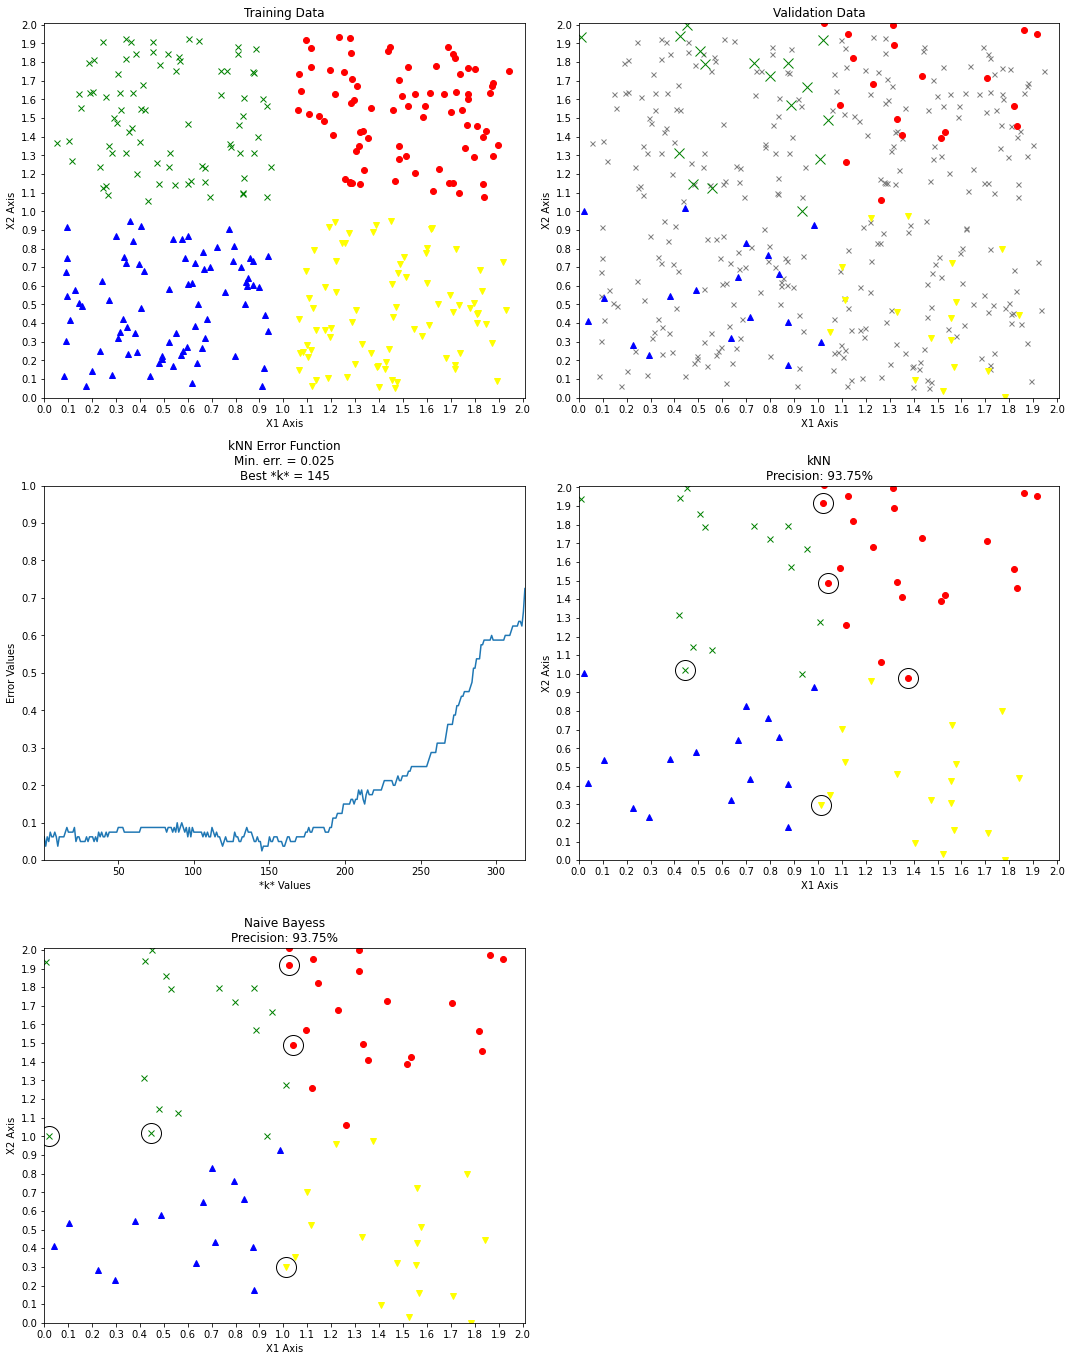

In [14]:
N_v = 20
N_t = 80
training_data = standard_data_generator(N_t, 0.45)
validation_data = standard_data_generator(N_v, 0.55)
fig = plt.figure(figsize=(15, 25))
plot_training_data_only(training_data, 1, N_t)
plot_validation_data(training_data, validation_data, 2, N_t, N_v)
plot_knn_errors(training_data, validation_data, 3)
plot_naive_bayess(training_data, validation_data, 5)
#plot_logistic_regression(training_data, validation_data, 6)
plt.tight_layout()
plt.draw()